### Auswertung der Tests


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 0.1,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [13]:
path = "LGT_h=1_finite_mu/"
# load the AL data
ALdata = {}
for folder in os.listdir(path):
    if os.path.isdir(path+"/"+folder) and folder!= "__pycache__":
        print(folder)
        # load data
        data = {}
        data["KL"] = pd.read_csv(path+"/"+folder + "/KL.csv")
        try:
            data["KL Qucumber"] = pd.read_csv(path+"/"+folder+ "/KL(Qucumber).csv")
            data["rescaled fidelity"] = pd.read_csv(path+"/"+folder + "/rescaled_fidelity.csv")
        except OSError:
            pass
        data["total density"] = pd.read_csv(path+"/"+folder + "/total_density.csv")
        data["density difference"] = pd.read_csv(path+"/"+folder + "/density_difference.csv")
        data["correlator difference"] = pd.read_csv(path+"/"+folder + "/correlator_difference.csv")
        #data["sigmax difference"] = pd.read_csv(path+"/"+folder + "/sigmax_difference.csv")
        ALdata[folder.split("_")[0]] = data
        print(data.keys())


# load baseline data
baseline_data = {}
for folder in os.listdir(path):
    if os.path.isdir(path+"/"+folder) and folder!= "__pycache__" and folder!= "Training_data":
        print(folder)
        # load data
        data = {}
        data["KL"] = pd.read_csv(path+"/"+folder + "/baseline_KL.csv")
        try:
            data["KL Qucumber"] = pd.read_csv(path+"/"+folder+ "/baseline_KL(Qucumber).csv")
            data["rescaled fidelity"] = pd.read_csv(path+"/"+folder + "/baseline_rescaled_fidelity.csv")
        except OSError:
            pass
        data["total density"] = pd.read_csv(path+"/"+folder + "/baseline_total_density.csv")
        try:
            data["density difference"] = pd.read_csv(path+"/"+folder + "/baseline_density_difference.csv")
            data["correlator difference"] = pd.read_csv(path+"/"+folder + "/baseline_correlator_difference.csv")
            #data["sigmax difference"] = pd.read_csv(path+"/"+folder + "/baseline_sigmax_difference.csv")
        except FileNotFoundError:
            pass
        baseline_data[folder.split("_")[0]] = data
        print(data.keys())
print(ALdata.keys())
print(baseline_data.keys())




9_qubits_1


FileNotFoundError: [Errno 2] No such file or directory: 'GHZ_phase//9_qubits_1/correlator_difference.csv'

### Plot for each number of query samples

Empty DataFrame
Columns: [ZZZZZZZZZZZZZZZZZZZ ]
Index: []


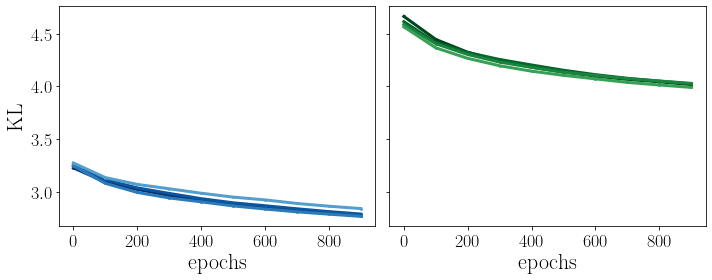

                                                   0
0   (7.999999941595601349e+00+7.70190118251207540...
7.999999941595601
                                                   0
0   (7.999999941595601349e+00+7.70190118251207540...
7.999999941595601
                                                   0
0   (7.999999941595601349e+00+7.70190118251207540...
7.999999941595601
                                                   0
0   (7.999999941595601349e+00+7.70190118251207540...
7.999999941595601


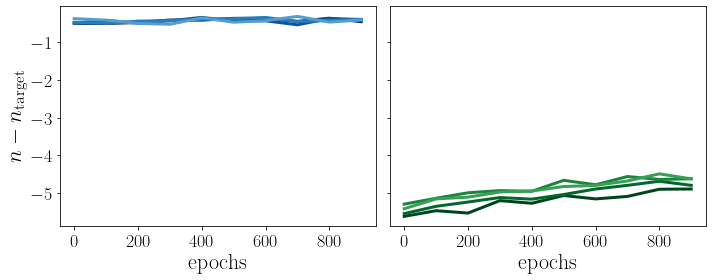

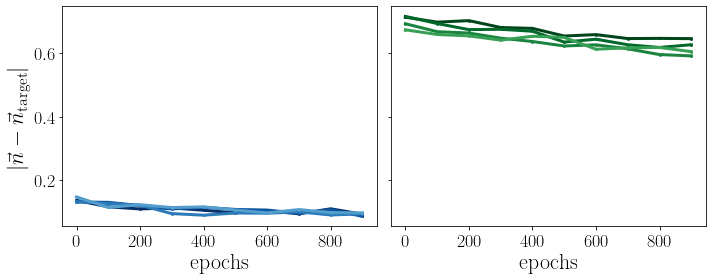

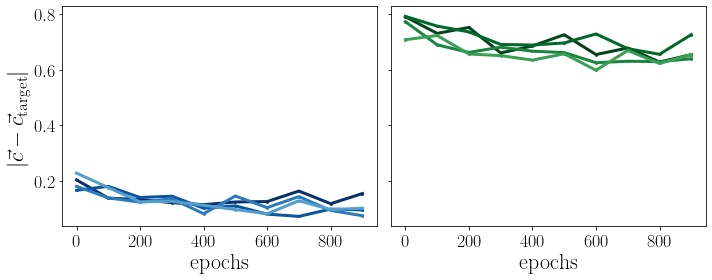

In [3]:
query_samples = "19"

data = ALdata[query_samples]
if path.split("/")[0][:3]=="LGT":
    d = {path.split("/")[0]:"LatticeGaugeModel/1samples/query_by_amplitude_and_phase/baseline"}
else:
    d = {path.split("/")[0]:path.split("/")[0].split("_")[0]+"/1samples/query_by_amplitude_and_phase/baseline"}
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
num_samples = str(len(samples))
bases = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
print(bases)
num_bases = str(len(bases)+1)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
for q, quantity in enumerate(list(data.keys())):
    fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey = True)
    for RBM in enumerate(list(data[quantity].columns)[1:]):
        if quantity == "rescaled fidelity":
            ax[0].plot(data[quantity][RBM[1]].index*100, 1-data[quantity][RBM[1]], "-o", markersize = 2, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(baseline_data[query_samples][quantity][list(data[quantity].columns*100)[1]].index, 1-baseline_data[query_samples][quantity][RBM[1]], "-o", markersize = 2, color = scalarMap_g.to_rgba(values[int(RBM[1])]))
        elif quantity == "total density":
            target_density = pd.read_csv(path + "/"+query_samples+"_qubits/target_total_density.csv", header=None)
            print(target_density)
            td = (complex(target_density[0][0].split("(")[-1].split(")")[0]).real)
            print(td)
            target_density = np.ones(len(data[quantity][RBM[1]]))*td
            target_density1 = np.ones(len(baseline_data[query_samples][quantity][RBM[1]]))*td
            x = np.arange(0, len(data[quantity][RBM[1]]))
            x1 = np.arange(0, len(baseline_data[query_samples][quantity][RBM[1]]))
            ax[0].plot(x*100, data[quantity][RBM[1]]-target_density, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(x1*100, baseline_data[query_samples][quantity][RBM[1]]-target_density1, color = scalarMap_g.to_rgba(values[int(RBM[1])]))
        else:
            ax[0].plot(data[quantity][RBM[1]].index*100, data[quantity][RBM[1]], "-o", markersize = 2, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(baseline_data[query_samples][quantity][list(data[quantity].columns)[1]].index*100, baseline_data[query_samples][quantity][RBM[1]], "-o", markersize = 2, color = scalarMap_g.to_rgba(values[int(RBM[1])]))

    if quantity == "rescaled fidelity":
        ax[0].set_ylabel(r"$1-f^{1/N}$")
    elif quantity == "total density":
        ax[0].set_ylabel(r"$n-n_{\mathrm{target}}$")
    elif quantity == "density difference":
        ax[0].set_ylabel(r"$\vert \vec{n}-\vec{n}_{\mathrm{target}}\vert$")
    elif quantity == "correlator difference":
        ax[0].set_ylabel(r"$\vert \vec{c}-\vec{c}_{\mathrm{target}}\vert$")
    else: ax[0].set_ylabel(quantity)
    ax[0].set_xlabel("epochs")
    #ax[1].set_ylabel(quantity)
    ax[1].set_xlabel("epochs")
    #ax[0].set_title(quantity + " with active learning", fontsize=16)
    #ax[1].set_title("baseline "+quantity, fontsize=16)
    #ax[q].legend()
    plt.sca(ax[ 0])
    #plt.xticks(np.arange(0, len(data[quantity][RBM[1]])+1, int(len(data[quantity][RBM[1]])/10)), np.arange(0, len(data[quantity][RBM[1]])+1, int(len(data[quantity][RBM[1]])/10))*100)
    plt.sca(ax[1])
    
    #plt.xticks(np.arange(0, len(baseline_data[query_samples][quantity][RBM[1]])+1, int(len(baseline_data[query_samples][quantity][RBM[1]])/10)), np.arange(0, len(baseline_data[query_samples][quantity][RBM[1]])+1, int(len(baseline_data[query_samples][quantity][RBM[1]])/10))*100)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.savefig(path+path.split("/")[0]+"_"+quantity+"_"+query_samples+"_qubits_summary.pdf", dpi=1000)
    plt.show()

Empty DataFrame
Columns: [ZZZZZZZZZZZZZZZZZZZ ]
Index: []
0.1361209390872871
0.006296238859327724
0.19538132244032938
0.023347406025609235
9    0.0917
dtype: float64
9    0.004088
dtype: float64
9    0.107702
dtype: float64
9    0.029297
dtype: float64
[0.6456849222645841, 0.626540289960824, 0.5912214961149264, 0.6046704206741313]


C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.


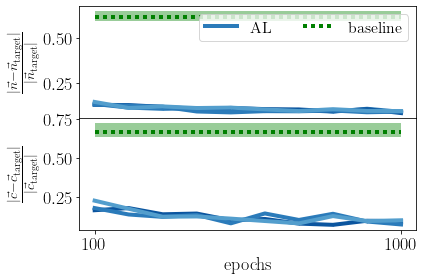

In [4]:
query_samples = "19"
data = ALdata[query_samples]
if path.split("/")[0][:3]=="LGT":
    d = {path.split("/")[0]:"LatticeGaugeModel/1samples/query_by_amplitude_and_phase/baseline"}
else:
    d = {path.split("/")[0]:path.split("/")[0].split("_")[0]+"/1samples/query_by_amplitude_and_phase/baseline"}
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
num_samples = str(len(samples))
bases = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
print(bases)
num_bases = str(len(bases)+1)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
fig, ax= plt.subplots(2,1,figsize=(6,4), sharex=True)
quantity = "density difference"
quantity2 = "correlator difference"

print(np.mean(data[quantity].iloc[0,1:]))
print(np.std(data[quantity].iloc[0,1:]))
print(np.mean(data[quantity2].iloc[0,1:]))
print(np.std(data[quantity2].iloc[0,1:]))

print(np.mean(data[quantity].iloc[-1:,1:], axis=1))
print(np.std(data[quantity].iloc[-1:,1:], axis=1))
print(np.mean(data[quantity2].iloc[-1:,1:], axis=1))
print(np.std(data[quantity2].iloc[-1:,1:], axis=1))
#baseline values
bl_value1 = []
bl_value2=[]
for i in (list(data[quantity].columns)):
    bl_value1.append(baseline_data[query_samples][quantity].iloc[-1, :][i])
    bl_value2.append(baseline_data[query_samples][quantity2].iloc[-1, :][i])
print(bl_value1[1:])
for RBM in enumerate(list(data[quantity].columns)[1:]):
    x = (data[quantity][RBM[1]].index+1)*100
    if RBM[0] ==0:
        ax[0].plot(x, ([item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax[0].plot(x, ([np.mean(bl_value1[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))
        ax[1].plot(x, ([np.mean(bl_value2[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline",linestyle= (0,(1,1)))
        ax[0].fill_between(x,[max(bl_value1[1:]) for item in x], [min(bl_value1[1:]) for item in x],facecolor = "green", alpha=0.4)
        ax[1].fill_between(x,[max(bl_value2[1:]) for item in x], [min(bl_value2[1:]) for item in x],facecolor = "green", alpha=0.4)

    else:
        ax[0].plot(x, ([item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
        #ax[0].fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],color = scalarMap_g.to_rgba(values[int(RBM[1])]), alpha=0.9)
        ax[1].plot(x, (data[quantity2][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
ax[0].legend(loc="upper right", fontsize=16, ncol=2)
#ax[0].set_ylabel(r"$\frac{\vert \vec{n}-\vec{n}_{\mathrm{target}}\vert}{\vert\vec{n}_{\mathrm{target}}\vert}$", fontsize=20)
#ax[1].set_ylabel(r"$\frac{\vert \vec{c}-\vec{c}_{\mathrm{target}}\vert}{\vert\vec{c}_{\mathrm{target}}\vert}$", fontsize=20)
ax[0].set_ylabel(r"$\frac{\vert \vec{n}-\vec{n}_{\mathrm{target}}\vert}{\vert \vec{n}_{\mathrm{target}}\vert}$", fontsize=20)
ax[1].set_ylabel(r"$\frac{\vert \vec{c}-\vec{c}_{\mathrm{target}}\vert}{\vert \vec{c}_{\mathrm{target}}\vert}$", fontsize=20)

ax[1].set_xlabel("epochs", fontsize=18)
#ax[0].set_ylim(-0.001, 0.7)
#ax[1].set_ylim(-0.001, 0.75)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.xticks([100, 1000])

plt.savefig(path+path.split("/")[0]+"_allquantities_"+query_samples+"_qubits_summary.pdf", dpi=1000)
plt.show()

Empty DataFrame
Columns: [ZZZZZZZZZZZZZZZ ]
Index: []


KeyError: 'rescaled fidelity'

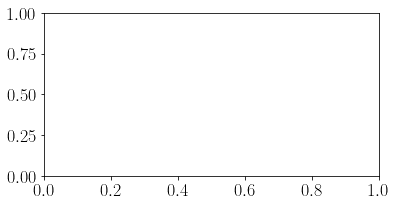

In [6]:
query_samples = "15"
data = ALdata[query_samples]
if path.split("/")[0][:3]=="LGT":
    d = {path.split("/")[0]:"LatticeGaugeModel/1samples/query_by_amplitude_and_phase/baseline"}
else:
    d = {path.split("/")[0]:path.split("/")[0].split("_")[0]+"/1samples/query_by_amplitude_and_phase/baseline"}
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
num_samples = str(len(samples))
bases = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
print(bases)
num_bases = str(len(bases)+1)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
fig, ax= plt.subplots(1,1,figsize=(6,3), sharex=True)
quantity = "rescaled fidelity"

print(np.mean(data[quantity].iloc[0,1:]))
print(np.std(data[quantity].iloc[0,1:]))


print(np.mean(data[quantity].iloc[-1:,1:], axis=1))
print(np.std(data[quantity].iloc[-1:,1:], axis=1))

#baseline values
bl_value1 = []
bl_value2=[]
for i in (list(data[quantity].columns)):
    bl_value1.append(baseline_data[query_samples][quantity].iloc[-1, :][i])
print(bl_value1[1:])
for RBM in enumerate(list(data[quantity].columns)[1:]):
    x = (data[quantity][RBM[1]].index+1)*100
    if RBM[0] ==0:
        ax.plot(x, ([1- item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax.plot(x, ([1-np.mean(bl_value1[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))
        ax.fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],facecolor = "green", alpha=0.4)
    else:
        ax.plot(x, ([1-item for item in data[quantity][RBM[1]]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
        ax.legend(loc="upper right", fontsize=16, ncol=2)
#ax[0].set_ylabel(r"$\frac{\vert \vec{n}-\vec{n}_{\mathrm{target}}\vert}{\vert\vec{n}_{\mathrm{target}}\vert}$", fontsize=20)
#ax[1].set_ylabel(r"$\frac{\vert \vec{c}-\vec{c}_{\mathrm{target}}\vert}{\vert\vec{c}_{\mathrm{target}}\vert}$", fontsize=20)
ax.set_ylabel(r"$1-f^{1/N}$", fontsize=20)

ax.set_xlabel("epochs", fontsize=18)
#ax[0].set_ylim(-0.001, 0.7)
#ax[1].set_ylim(-0.001, 0.75)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.xticks([100, 1000, 2000, 3000])

plt.savefig(path+path.split("/")[0]+"_fidelity_"+query_samples+"_qubits_summary.pdf", dpi=1000)
plt.show()

Final values for the callbacks

In [7]:

for q, quantity in enumerate(list(ALdata[query_samples].keys())):
    print(quantity)
    value = []
    bl_value = []
    for i in (list(data[quantity].columns)):
        value.append(ALdata[query_samples][quantity].iloc[-1, :][i])
        bl_value.append(baseline_data[query_samples][quantity].iloc[-1, :][i])
    print("AL: "+ str(np.mean(value[1:])) + " pm " + str(np.std(value[1:])))
    print("baseline: "+ str(np.mean(bl_value[1:])) + " pm " + str(np.std(bl_value[1:])))
print("samples: " +str(num_samples))
print("configs: " +str(num_bases))

KL
AL: 1.4021312287932748 pm 0.02764278499385844
baseline: 2.381379945535503 pm 0.028622851016206666
total density
AL: 5.668500000000001 pm 0.045543934832202884
baseline: 2.465880592637352 pm 0.07115448164762102
density difference
AL: 0.09911538938248722 pm 0.0049078855947043325
baseline: 0.6182088900263413 pm 0.008907609397544508
correlator difference
AL: 0.1927870519409906 pm 0.021244533550139194
baseline: 0.7476211273571908 pm 0.014639891220901806
samples: 399
configs: 1


In [9]:
import numpy as np
import matplotlib.pyplot as plt
plot_params = {"text.usetex": True, "font.family": "serif",
                            "legend.fontsize": 7, "figure.figsize": (2.5, 2.5),
                            "axes.labelsize": 7, "xtick.labelsize": 7,
                            "ytick.labelsize": 9, "lines.linewidth": 3,
                            "lines.markeredgewidth": 0.8, "lines.markersize": 3,
                            "lines.marker": "o", "patch.edgecolor": "black"}
plt.rcParams.update(plot_params)
plt.style.use("seaborn-deep")

6.000000000000001
[0.4999999999999998]
6.000000000000001
[0.4999999999999998, 0.05766666666666667]
6.000000000000001
[0.4999999999999998, 0.05766666666666667, 0.05250000000000006]
6.000000000000001
[0.4999999999999998, 0.05766666666666667, 0.05250000000000006, 0.045000000000000366]
6.000000000000001
[0.4999999999999998, 0.05766666666666667, 0.05250000000000006, 0.045000000000000366, 0.0658333333333334]
7.999999941595601
[0.12500000821311863]
7.999999941595601
[0.12500000821311863, 0.05899999313018272]
7.999999941595601
[0.12500000821311863, 0.05899999313018272, 0.05162499307634081]
7.999999941595601
[0.12500000821311863, 0.05899999313018272, 0.05162499307634081, 0.05137499307451603]
7.999999941595601
[0.12500000821311863, 0.05899999313018272, 0.05162499307634081, 0.05137499307451603, 0.053124993087291586]
2.0000000000000013
[3.499999999999997]
2.0000000000000013
[3.499999999999997, 0.0415000000000004]
2.0000000000000013
[3.499999999999997, 0.0415000000000004, 0.06500000000000057]
2.000

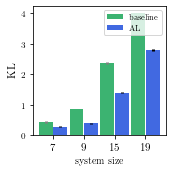

['7', '9', '15', '19']
7
9
15
19


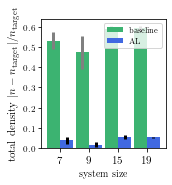

['7', '9', '15', '19']
7
9
15
19


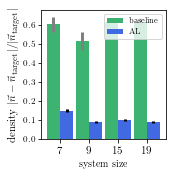

['7', '9', '15', '19']
7
9
15
19


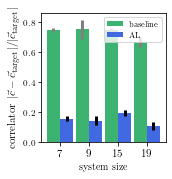

['7', '9', '15', '19']
7
9
15
19


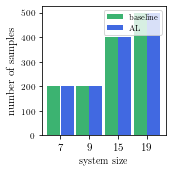

['7', '9', '15', '19']
7
9
15
19


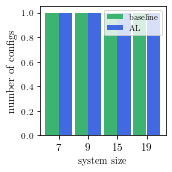

In [10]:
data = {}
bl_data = {}
for qubit in (list(ALdata.keys())):
    data[qubit] = {}
    bl_data[qubit] = {}
    for q, quantity in enumerate(list(ALdata[qubit].keys())):
        value = []
        bl_value = []
        for i in (list(ALdata[qubit][quantity].columns)):
            data[qubit][quantity] = {}
            bl_data[qubit][quantity] = {}
            if quantity == "total density":
                if path.split("/")[0][:10]== "LGT_with_h":
                    label = r"total density $\vert n - n_{\mathrm{target}}\vert$"
                    target_density = pd.read_csv(path + "/"+qubit+"_qubits/target_total_density.csv", header=None)
                    td = (complex(target_density[0][0].split("(")[-1].split(")")[0]).real)
                    print(td)
                    value.append(np.abs(ALdata[qubit][quantity].iloc[-1, :][i]-td))
                    bl_value.append(np.abs(baseline_data[qubit][quantity].iloc[-1, :][i]-td))
                    print(value)
                else:
                    label = r"total density $\vert n - n_{\mathrm{target}}\vert / n_{\mathrm{target}} $"
                    target_density = pd.read_csv(path + "/"+qubit+"_qubits/target_total_density.csv", header=None)
                    td = (complex(target_density[0][0].split("(")[-1].split(")")[0]).real)
                    print(td)
                    value.append(np.abs(ALdata[qubit][quantity].iloc[-1, :][i]-td)/td)
                    bl_value.append(np.abs(baseline_data[qubit][quantity].iloc[-1, :][i]-td)/td)
                    print(value)
            elif quantity == "rescaled fidelity":
                label = r"$1- f^{1/N} $"
                value.append(1-ALdata[qubit][quantity].iloc[-1, :][i])
                bl_value.append(1-baseline_data[qubit][quantity].iloc[-1, :][i])
            else:
                value.append(ALdata[qubit][quantity].iloc[-1, :][i])
                bl_value.append(baseline_data[qubit][quantity].iloc[-1, :][i])
            if path.split("/")[0][:10]== "LGT_with_h":
                if quantity == "density difference":
                    label = r"density $ \vert \vec{n}-\vec{n}_{\mathrm{target}}\vert$"
                if quantity == "correlator difference":
                    label = r"correlator $ \vert \vec{c}-\vec{c}_{\mathrm{target}}\vert $"

            else:
                if quantity == "density difference":
                    label = r"density $ \vert \vec{n}-\vec{n}_{\mathrm{target}}\vert / \vert \vec{n}_{\mathrm{target}}\vert $"
                if quantity == "correlator difference":
                    label = r"correlator $ \vert \vec{c}-\vec{c}_{\mathrm{target}}\vert / \vert \vec{c}_{\mathrm{target}}\vert $"
            
            if quantity == "KL" or quantity == "KL Qucumber":
                label = quantity
        data[qubit][quantity]["label"] = label
        data[qubit][quantity]["mean"]=np.mean(value[1:])
        data[qubit][quantity]["std"]=np.std(value[1:])
        bl_data[qubit][quantity]["mean"]=np.mean(bl_value[1:])
        bl_data[qubit][quantity]["std"]=np.std(bl_value[1:])
    samples = pd.read_csv(path + "/"+qubit+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
    num_samples = (len(samples)+1)
    bases = pd.read_csv(path + "/"+qubit+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
    num_bases = (len(bases)+1)
    data[qubit]["number of samples"] = {}
    data[qubit]["number of configs"] = {}
    bl_data[qubit]["number of samples"] = {}
    bl_data[qubit]["number of configs"] = {}
    data[qubit]["number of samples"]["mean"] = num_samples
    bl_data[qubit]["number of samples"]["mean"] = num_samples
    data[qubit]["number of configs"]["mean"] = num_bases
    bl_data[qubit]["number of configs"]["mean"] = num_bases
    data[qubit]["number of samples"]["std"] = 0
    bl_data[qubit]["number of samples"]["std"] = 0
    data[qubit]["number of configs"]["std"] = 0
    bl_data[qubit]["number of configs"]["std"] = 0
    data[qubit]["number of configs"]["label"] = "number of configs"
    data[qubit]["number of samples"]["label"] = "number of samples"
    
    
print(data)
#print(bl_data)

for quantity in list(data["7"].keys()):
    plt.figure()
    l = [int(item) for item in list(ALdata.keys())]
    l.sort()
    l = [str(item) for item in l]
    print(l)
    for i, qubit in enumerate(l):#, "19"]):
        print(qubit)
        if i == 0:
            plt.bar(i-0.23, bl_data[qubit][quantity]["mean"], yerr = bl_data[qubit][quantity]["std"], color="mediumseagreen", ecolor = "grey", width = 0.45, label="baseline")
            plt.bar(i+0.23, data[qubit][quantity]["mean"], yerr = data[qubit][quantity]["std"], color="royalblue", ecolor = "black", width = 0.45, label="AL")
        else:
            plt.bar(i-0.23, bl_data[qubit][quantity]["mean"], yerr = bl_data[qubit][quantity]["std"], color="mediumseagreen", ecolor = "grey", width = 0.45)
            plt.bar(i+0.23, data[qubit][quantity]["mean"], yerr = data[qubit][quantity]["std"], color="royalblue", ecolor = "black", width = 0.45) 
    #if quantity == "rescaled fidelity":
    #    plt.ylim(0.5,1.05)
    plt.ylabel(data[qubit][quantity]["label"],fontsize=11)
    plt.xlabel("system size",fontsize=10)
    plt.xticks(range(len(list(ALdata.keys()))), l,fontsize=11)#, "19 qubits"])
    plt.legend(loc = "upper right", fontsize=8) 
     
    plt.tight_layout()
    plt.savefig(path + path.split("/")[0]+"_"+quantity+".pdf", dpi = 1200)
    plt.show()

In [11]:
for qubit in (list(data.keys())):
    print(qubit + " qubits:")
    print(data[qubit]["number of samples"]["mean"])
    print(data[qubit]["number of configs"]["mean"])

15 qubits:
400
1
19 qubits:
500
1
7 qubits:
200
1
9 qubits:
200
1


In [12]:
m = [0.9221034144689362,0.923709175211497,0.9252077519495921,0.9257995216003883]
print(np.mean(m))
print(np.var(m))

m = [0.9334286048307957,0.937649084517284,0.938958638711178,0.938666993446727]
print(np.mean(m))
print(np.var(m))

0.9242049658076034
2.0526286417774916e-06
0.9371758303764962
4.916910408088567e-06
